# Measurement and Analysis of Ping-Pong Time

This document is used to do a demonstration of Rstudio. It has an introduction, followed by a step-by-step receipt to conduct an analysis following the principles of literate programming.

## Introduction

An experimental protocol is the description of the experience that has been conducted. It explains how the measurements have been implemented. For this Rstudio demonstration, we have measured the ping-pong time. It corresponds to the time taken by a message of a given size to go from one machine to another and back to the original machine. The following C-based code represents how the ping-pong time is measured, for a given `size` message in an environment with two processes (the `sender` and the `receiver`). We can see that the measured time is the one observed by the sender.
```c
if (sender) {
  atime = get_time();
  send_message(size);
  btime = get_time();
  recv_message(size);
  ctime = get_time();
  //Print (btime - atime) + (ctime - btime)
}else{
  recv_message(size);
  send_message(size);
}
```
Network measurements can be affected by a number of external factors. The most easily observed ones are the operating system complexity, its network layer, and also the wired or wireless hardware. All these factors increase the measurement variability, which should be quantified and taken into account during the analysis. As a consequence, the experiment has been replicated many times (by injecting the code above in a for loop).
The computer program generates a textual file in the CSV (Comma-Separated Values) format. Each line of this CSV file contains one measurement, as the output of the Print command above.

## Synthetic Ping-Pong Measurements (Demonstration)

We use synthetic measurements created as detailed below for this demonstration. For such reason, skip this section is you are playing with the given real measurements.

### Create data
To create the synthetic ping-pong measurements, the code below is executed to generate 50 measurements considering an average of 4 and standard deviation of 1.5. The resulting values are kept in the `times` vector, which is written as a CSV file with the name `pp-synthetic.csv`.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) # figure size (w, h)

In [2]:
numpy.random.seed(42)
times = numpy.random.normal(size=50, loc=4, scale=1.5)
numpy.savetxt("pp-synthetic.csv", times, delimiter=",")
times

array([4.74507123, 3.79260355, 4.97153281, 6.28454478, 3.64876994,
       3.64879456, 6.36881922, 5.15115209, 3.29578842, 4.81384007,
       3.30487346, 3.30140537, 4.36294341, 1.13007963, 1.41262325,
       3.15656871, 2.48075332, 4.471371  , 2.63796389, 1.88154445,
       6.19847315, 3.66133555, 4.10129231, 1.86287772, 3.18342591,
       4.16638388, 2.27350963, 4.56354703, 3.09904197, 3.56245938,
       3.09744008, 6.77841728, 3.97975416, 2.41343361, 5.23381737,
       2.16873453, 4.31329539, 1.06049481, 2.00772093, 4.29529185,
       5.10769987, 4.25705242, 3.82652758, 3.54834446, 1.78221701,
       2.92023369, 3.30904184, 5.58568334, 4.51542743, 1.35543977])

The `numpy.random.seed` call is here only to keep the synthetic analysis fully reproducible.

### Read data
To read the synthetic ping-pong measurements, the code below reads the file `pp-synthetic.csv` and creates the data frame `df`. This data frame has a single column called `time` which contains all measurements that have been previously generated.  The call to `df.head()` lists the first rows of the data frame.

In [3]:
df = pandas.read_csv("pp-synthetic.csv", names=['time'])
df.head()

time
0  4.745071
1  3.792604
2  4.971533
3  6.284545
4  3.648770

The best way to get an overview is to plot the data (see below). Unaware of the true mean, define the following metrics, providing a discussion:

- Estimate the ping-pong measurement (mean, median)
- Quantify the variability (sd)

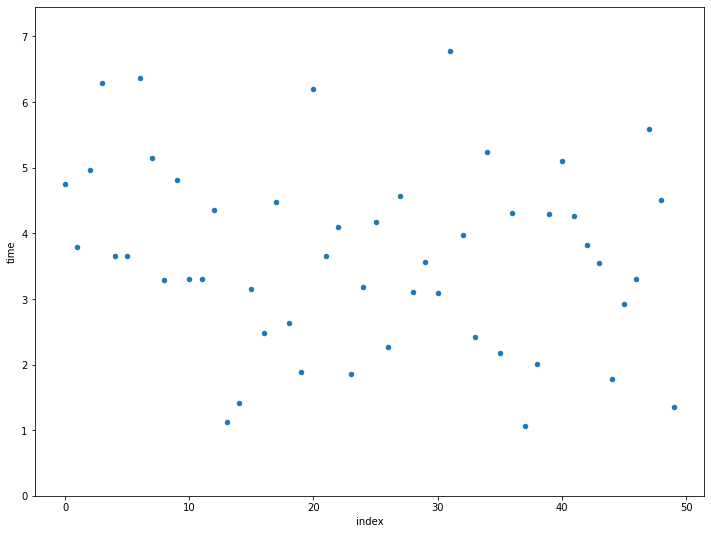

In [4]:
df['index'] = range(len(df))
df.plot.scatter(x='index', y='time', ylim=(0, df['time'].max()*1.1))  # Unfortunately, Matplotlib is unable to automatically find a nice axis range, so we *need* this ylim argument.

### Statistical Summary

A summary of a vector can be easily obtained in Python with:

In [5]:
df['time'].describe()

count    50.000000
mean      3.661789
std       1.400503
min       1.060495
25%       2.708531
50%       3.648782
75%       4.504413
max       6.778417
Name: time, dtype: float64

### Boxplot

A much nicer way to represent the metrics of the summary above is using a boxplot. It takes all the values and create a visual representation. Can you explain what represents each element of the boxplot? How it helps you to better understand the data?

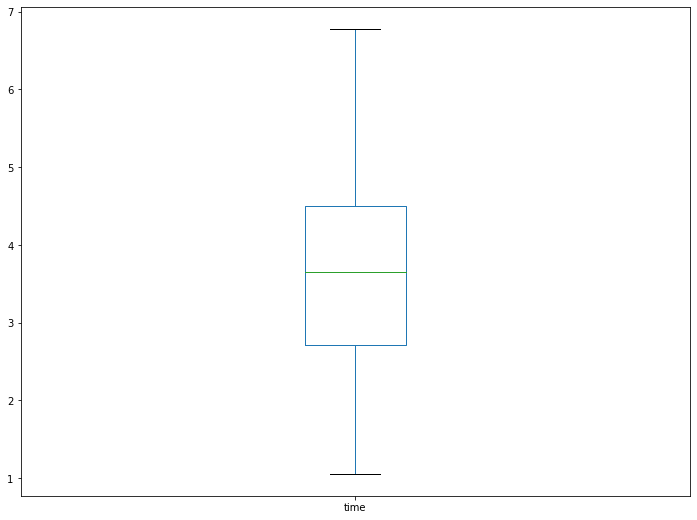

In [6]:
df['time'].plot.box()

### Histogram

A histogram counts how many times the observed value falls into different bins. For time measurements, a bin is represented by an interval of values, for instance (2,3). Whenever the measurement falls into a bin, a counter is incremented. Below we can see the histogram for the ping-pong synthetic measurement. We have used 7 bins (as explicited by the `bins` parameter).

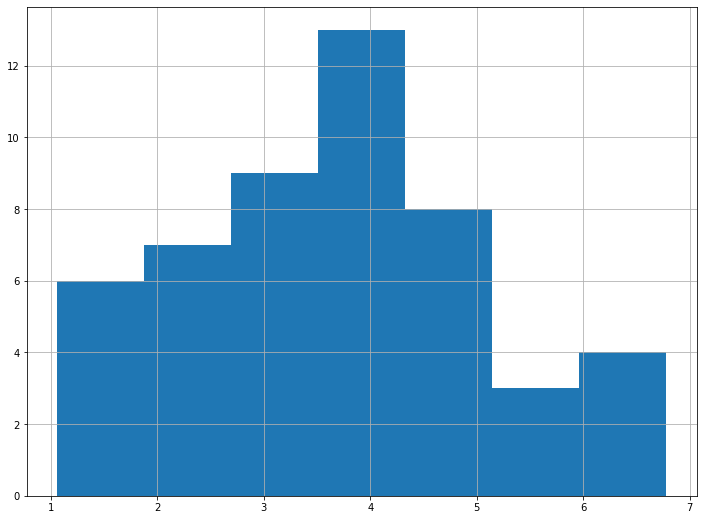

In [7]:
df['time'].hist(bins=7)

The problem of histograms is that by changing the number of bins, the perception based on the plot can radically change. Let's for instance force the number of bins to 2:

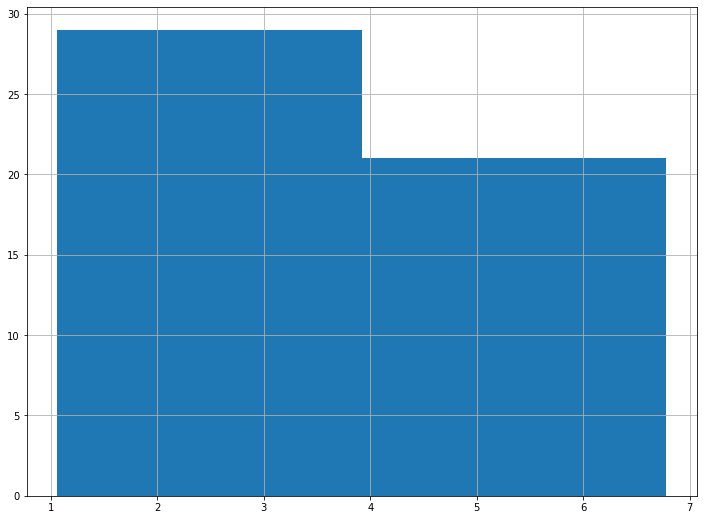

In [8]:
df['time'].hist(bins=2)

We can see that two bins hardly represents the reality.

### Variability

As we previously mentioned, ping-pong measurements suffer external influences that might affect estimations. As a consequence, we need to evaluate the variability. A common measure of variability is the standard deviation, calculated like this:

In [9]:
df['time'].std()

1.4005031728246673

### Wrap up
We have synthetically generated measurements for ping-pong, by using the `numpy.random.normal` function of Python. We asked for a true mean of 4, with a standard deviation of 1.5. so, unaware of such values (using only statistics), we can estimate the mean and standard deviation as:

In [10]:
print(df['time'].mean())
print(df['time'].std())

3.6617891421157895
1.4005031728246673


Which are slightly different from the true values.

## Real Ping-Pong Measurements (TD)

The measurements detailed in the introduction have been obtained for a number of different message sizes. We provide five of them here, with the following names:

In [11]:
!ls data/PP_size*.csv

data/PP_size_1.csv  data/PP_size_3.csv	data/PP_size_5.csv
data/PP_size_2.csv  data/PP_size_4.csv


In the above cell, note the exclamation mark for running a bash command instead of Python code.

These files have been obtained with the ping-pong experiment from 1 to 5 bytes. You should repeat all the steps of previous section using at least one of these files. Write your stastitical interpretation of the measurements. Here's how you can read all of them:

In [12]:
df_list = []
for i in range(1, 6):
    tmp = pandas.read_csv('data/PP_size_%d.csv' % i)
    tmp['size'] = i
    df_list.append(tmp)
df = pandas.concat(df_list)
df.head()

time  size
0  0.000133     1
1  0.000100     1
2  0.000052     1
3  0.000038     1
4  0.000031     1

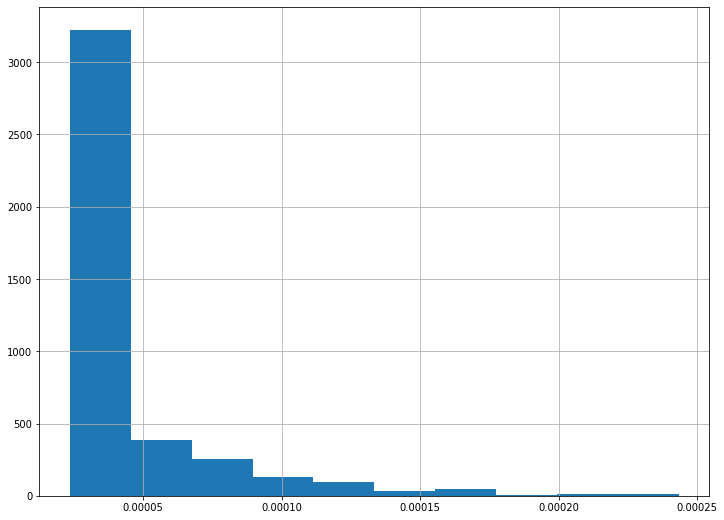

In [13]:
df['time'].hist()

## Iteration Duration of a Geophysics Parallel Application

Geophysics parallel applications are generally organized in timesteps. At each timestep, the mathematical model is calculated taking into account the time interval. As the simulation evolves, one can measure how much time it takes to calculate the mathematical model for each iteration. Here we provide a data set that contains the duration of each iteration in a simulation composed of a little less than 500 iterations. Here's the code to read that data set:

In [14]:
df = pandas.read_csv('data/IterDuration.csv')
df.head()

duration
0  3.539277
1  3.539381
2  3.539294
3  3.539549
4  3.550483

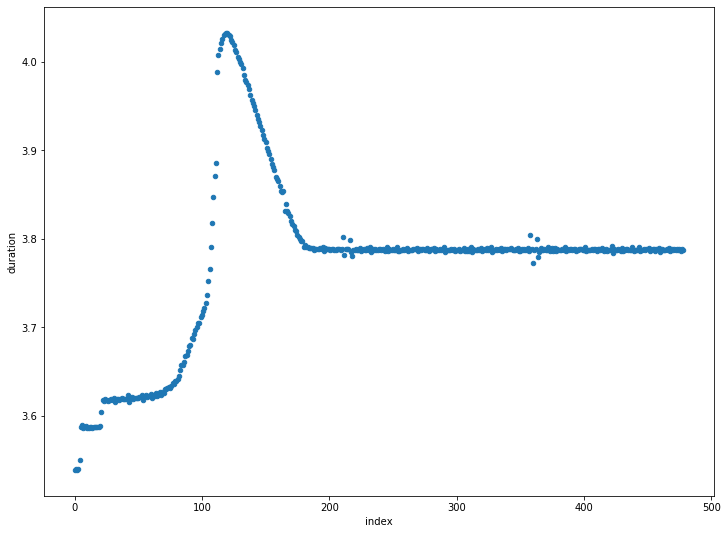

In [15]:
df['index'] = range(len(df))
df.plot.scatter(x='index', y='duration')